# Drawing Conclusions Quiz
Use the space below to explore `store_data.csv` to answer the quiz questions below.

In [1]:
# imports and load data
import pandas as pd
    import matplotlib.pyplot as plt
% matplotlib inline

df_store = pd.read_csv('store_data.csv')
df_store.head()

week  storeA  storeB  storeC  storeD  storeE
0  2014-05-04    2643    8257    3893    6231    1294
1  2014-05-11    6444    5736    5634    7092    2907
2  2014-05-18    9646    2552    4253    5447    4736
3  2014-05-25    5960   10740    8264    6063     949
4  2014-06-01    7412    7374    3208    3985    3023

In [2]:
df_store.tail()

week  storeA  storeB  storeC  storeD  storeE
195  2018-01-28     282    6351    7759    5558    1028
196  2018-02-04    4853    6503    4187    5956    1458
197  2018-02-11    9202    3677    4540    6186     243
198  2018-02-18    3512    7511    4151    5596    3501
199  2018-02-25    7560    6904    3569    5045    2585

In [3]:
# explore data
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
week      200 non-null object
storeA    200 non-null int64
storeB    200 non-null int64
storeC    200 non-null int64
storeD    200 non-null int64
storeE    200 non-null int64
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


In [4]:
# week está representada como string. Vamos converter para datetime
print(f'Tipo antes da conversão: {type(df_store["week"][0])}')

# convertendo
df_store['week'] = pd.to_datetime(df_store['week'])
print(f'Tipo depois da conversão: {type(df_store["week"][0])}')

Tipo antes da conversão: <class 'str'>
Tipo depois da conversão: <class 'pandas._libs.tslib.Timestamp'>


In [5]:
print(f'Maior data presente: {df_store["week"].max()}')
print(f'Último mês: {(df_store["week"].max().month)}')

# UDACITY resolveu por:
# df_store['week'].tail(1)

# novo data_set com vendas do último mês
mask_month = df_store['week'].dt.month == df_store['week'].max().month
mask_year = df_store['week'].dt.year == df_store['week'].max().year

df_last_month = df_store[mask_month & mask_year]
df_last_month.head()

Maior data presente: 2018-02-25 00:00:00
Último mês: 2


week  storeA  storeB  storeC  storeD  storeE
196 2018-02-04    4853    6503    4187    5956    1458
197 2018-02-11    9202    3677    4540    6186     243
198 2018-02-18    3512    7511    4151    5596    3501
199 2018-02-25    7560    6904    3569    5045    2585

In [6]:
# total sales for the last month
print(f'Soma de vendas da Loja A no último mês: {df_last_month["storeA"].sum()}')
print(f'Soma de vendas da Loja B no último mês: {df_last_month["storeB"].sum()}')
print(f'Soma de vendas da Loja C no último mês: {df_last_month["storeC"].sum()}')
print(f'Soma de vendas da Loja D no último mês: {df_last_month["storeD"].sum()}')
print(f'Soma de vendas da Loja E no último mês: {df_last_month["storeE"].sum()}')

Soma de vendas da Loja A no último mês: 25127
Soma de vendas da Loja B no último mês: 24595
Soma de vendas da Loja C no último mês: 16447
Soma de vendas da Loja D no último mês: 22783
Soma de vendas da Loja E no último mês: 7787


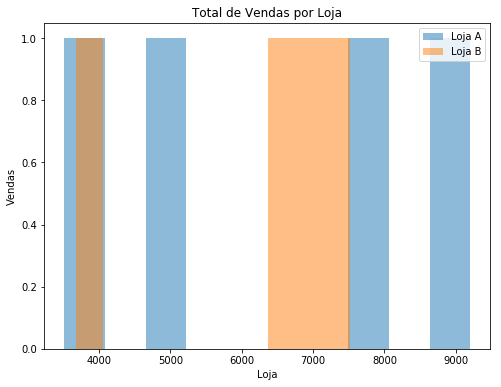

In [45]:
# Tentando plotar gráficos
import matplotlib.pyplot as plt
% matplotlib inline

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df_last_month['storeA'], alpha=0.5, label='Loja A')
ax.hist(df_last_month['storeB'], alpha=0.5, label='Loja B')
ax.set_title('Total de Vendas por Loja')
ax.set_xlabel('Loja')
ax.set_ylabel('Vendas')
ax.legend(loc='upper right')
plt.show()

In [7]:
# Selecionando apenas os dados de vendas (eliminando data)
df_last_month_filtered = df_last_month.iloc[:,1:]
df_last_month_filtered.head()

storeA  storeB  storeC  storeD  storeE
196    4853    6503    4187    5956    1458
197    9202    3677    4540    6186     243
198    3512    7511    4151    5596    3501
199    7560    6904    3569    5045    2585

In [8]:
# average sales

for loja in df_last_month_filtered:
    print(f'Média de vendas de {loja}: {df_last_month_filtered[loja].mean()}')

Média de vendas de storeA: 6281.75
Média de vendas de storeB: 6148.75
Média de vendas de storeC: 4111.75
Média de vendas de storeD: 5695.75
Média de vendas de storeE: 1946.75


In [46]:
# A questão é sobre média de vendas no geral e NÃO APENAS no último mês
for loja in df_store:
    print(f'Média de vendas da loja {loja}: {df_store[loja].mean()}')

Média de vendas da loja storeA: 5865.48
Média de vendas da loja storeB: 6756.71
Média de vendas da loja storeC: 4942.105
Média de vendas da loja storeD: 5431.405
Média de vendas da loja storeE: 2580.025


In [9]:
# sales on march 13, 2016
df_march_13 = df_store[df_store['week'] == '2016-03-13']
df_march_13.head()

week  storeA  storeB  storeC  storeD  storeE
97 2016-03-13    2054    1390    5112    5513    2536

In [47]:
df_march_13.max()

week      2016-03-13 00:00:00
storeA                   2054
storeB                   1390
storeC                   5112
storeD                   5513
storeE                   2536
dtype: object

In [10]:
# worst week for store C
df_store[df_store['storeC'] == df_store['storeC'].min()]['week']

9   2014-07-06
Name: week, dtype: datetime64[ns]

In [27]:
# df_store[df_store['week'] == '2014-07-06']['storeC']
df_store.iloc[9]['storeC']

927

In [29]:
# Melhor jeito de apresentar o pior resultado da loja C
df_store.loc[df_store['storeC'] == df_store['storeC'].min(), ['week', 'storeC']]

week  storeC
9 2014-07-06     927

Lembrando que:
.loc[condição booleana, [coluna(s) a serem trazidas]]

In [31]:
# total sales during most recent 3 month period

# Primeiro: setar data como index do DataFrame
df_store.set_index('week', inplace=True)
df_store.head()

storeA  storeB  storeC  storeD  storeE
week                                              
2014-05-04    2643    8257    3893    6231    1294
2014-05-11    6444    5736    5634    7092    2907
2014-05-18    9646    2552    4253    5447    4736
2014-05-25    5960   10740    8264    6063     949
2014-06-01    7412    7374    3208    3985    3023

In [32]:
df_store.last('3M')

storeA  storeB  storeC  storeD  storeE
week                                              
2017-12-03    5179    3850    6121    6778     113
2017-12-10    9348    5624    5446    5448     227
2017-12-17    5310    8647    5680    7049    3578
2017-12-24    8976    9503    6240    3882    2890
2017-12-31   11875    1527    6711    5265    1701
2018-01-07    8978   11312    4158    5019    3842
2018-01-14    6963    4014    4215    7153    3097
2018-01-21    5553    3971    3761    6255    3071
2018-01-28     282    6351    7759    5558    1028
2018-02-04    4853    6503    4187    5956    1458
2018-02-11    9202    3677    4540    6186     243
2018-02-18    3512    7511    4151    5596    3501
2018-02-25    7560    6904    3569    5045    2585

<b>Referências</b>

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.last.html

https://codeburst.io/dealing-with-datetimes-like-a-pro-in-pandas-b80d3d808a7f


In [35]:
# Retornando últimos três meses:

df_last_3_months = df_store.last('3M')
df_last_3_months.head(20)

storeA  storeB  storeC  storeD  storeE
week                                              
2017-12-03    5179    3850    6121    6778     113
2017-12-10    9348    5624    5446    5448     227
2017-12-17    5310    8647    5680    7049    3578
2017-12-24    8976    9503    6240    3882    2890
2017-12-31   11875    1527    6711    5265    1701
2018-01-07    8978   11312    4158    5019    3842
2018-01-14    6963    4014    4215    7153    3097
2018-01-21    5553    3971    3761    6255    3071
2018-01-28     282    6351    7759    5558    1028
2018-02-04    4853    6503    4187    5956    1458
2018-02-11    9202    3677    4540    6186     243
2018-02-18    3512    7511    4151    5596    3501
2018-02-25    7560    6904    3569    5045    2585

In [42]:
total = 0
for soma in df_last_3_months.sum():
    total += soma
print(f'Soma total de todas as vendas nos últimos 3 meses: US${total:.2f}')

Soma total de todas as vendas nos últimos 3 meses: US$336047.00


In [48]:
for loja in df_last_3_months:
    print(f'Soma de vendas da loja {loja}: {df_last_3_months[loja].sum()}')

Soma de vendas da loja storeA: 87591
Soma de vendas da loja storeB: 79394
Soma de vendas da loja storeC: 66538
Soma de vendas da loja storeD: 75190
Soma de vendas da loja storeE: 27334
